In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tqdm.notebook import tqdm

np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paths = glob.glob('/content/drive/MyDrive/satellite/Images/*.jpg',recursive=True)
len(paths)

63

In [ ]:
orig = np.array([np.asarray(Image.open(img)) for img in tqdm(paths)])
orig.shape

  0%|          | 0/63 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(63,)

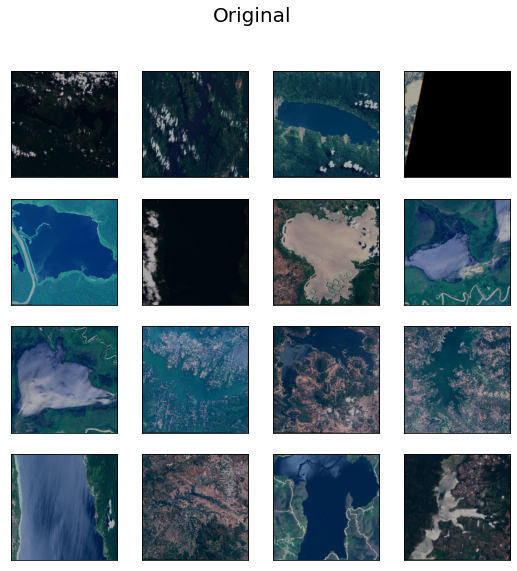

In [ ]:
plt.figure(figsize=(9,9))
dim = (256,256)
for i, img in enumerate(orig[0:16]):
  img=cv2.resize(img, dim)
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)

plt.suptitle("Original", fontsize=20)
plt.show()

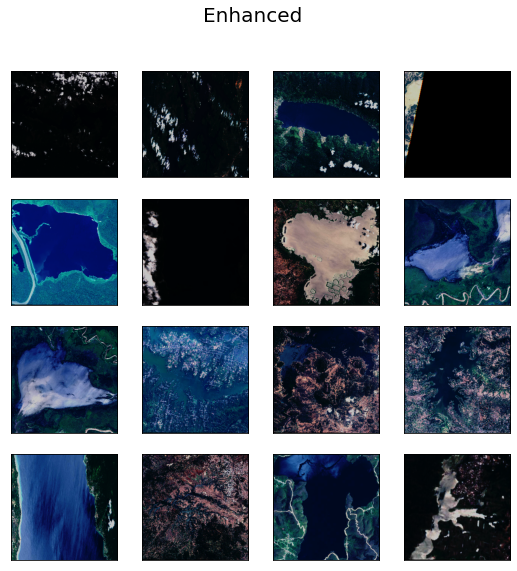

In [ ]:
plt.figure(figsize=(9,9))
dim = (256,256)
for i, img in enumerate(orig[0:16]):
  img=cv2.resize(img, dim)
  xp = [0, 64, 128, 192, 255]
  fp = [0, 16, 128, 240, 255]
  x = np.arange(256)
  table = np.interp(x, xp, fp).astype('uint8')
  img = cv2.LUT(img, table)
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)

plt.suptitle("Enhanced", fontsize=20)
plt.show()

In [ ]:
gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in tqdm(orig)])
gray.shape

  0%|          | 0/63 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(63,)

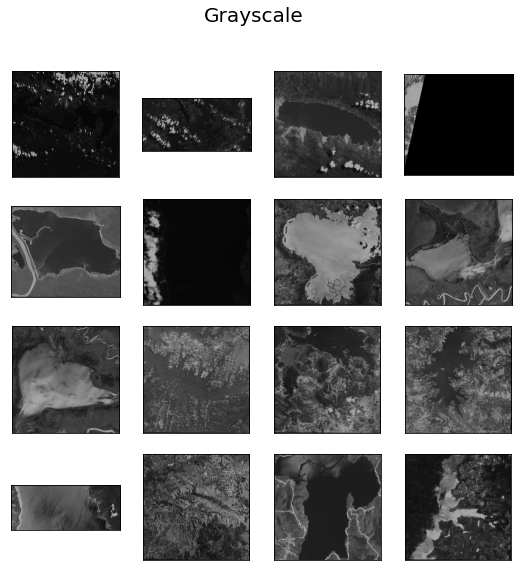

In [ ]:
plt.figure(figsize=(9,9))

for i, img in enumerate(gray[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.suptitle("Grayscale", fontsize=20)
plt.show()

In [ ]:
gray[0]

array([[ 4, 19, 18, ...,  6,  1,  1],
       [ 6, 24, 26, ..., 51, 43, 38],
       [ 5, 24, 29, ..., 53, 60, 69],
       ...,
       [28, 34, 34, ..., 17, 24,  3],
       [35, 38, 38, ..., 17, 25,  3],
       [ 4,  5,  4, ..., 17, 25,  3]], dtype=uint8)

In [ ]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm(gray)]

  0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
np.mean(gray[0])

52.881500244140625

In [ ]:
thresh[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

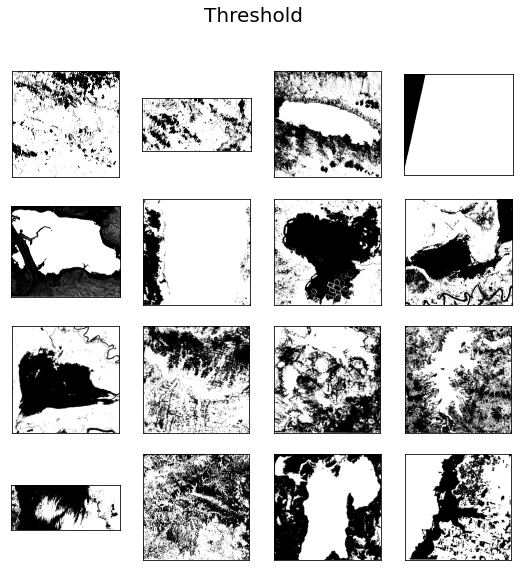

In [ ]:
plt.figure(figsize=(9,9))

for i, threshimg in enumerate(thresh[0:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(threshimg,cmap='gray')

plt.suptitle("Threshold", fontsize=20)
plt.show()